In [1]:
import numpy
numpy.random.seed(1234)
import tensorflow as tf
tf.set_random_seed(1234)
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

## Parameters

In [2]:

Theta = {}
Theta['w'] = tf.Variable(tf.truncated_normal([2,1],mean=0.0,stddev=0.02), tf.float32)
Theta['b'] = tf.Variable([0.1], tf.float32)

## Inference

In [3]:
x_    = tf.placeholder(tf.float32,[None,2])
logit_= tf.matmul(x_,Theta['w']) + Theta['b']
yhat_ = tf.nn.sigmoid(logit_)
y_    = tf.placeholder(tf.float32, [None,1])

## Loss

In [ ]:
def cross_entropy(y,y_hat):
  t    =  y * tf.log(y_hat) + (1-y) * tf.log(1-y_hat)
  loss = tf.reduce_mean(-t)
  return loss

loss_ = cross_entropy(y_,yhat_)

## Training Op

In [ ]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(1e-2)
train_op_ = optimizer.minimize(loss_)

## Data

In [6]:
# Data
samples_per_class = 100

mean1 = [4, 4]
cov1 = [[1, 0], [0, 1]]
mean2 = [10, 10]
cov2 = [[1, 0], [0, 1]]
Class1 = numpy.random.multivariate_normal(mean1, cov1, samples_per_class)

Class2 = numpy.random.multivariate_normal(mean2, cov2, samples_per_class)

Y1 = numpy.zeros([samples_per_class,1])
Y2 = numpy.ones([samples_per_class,1])


DATA_X = numpy.concatenate([Class1, Class2] ,axis = 0)
DATA_Y = numpy.concatenate([Y1, Y2] ,axis = 0)

### ploting

In [7]:
xmin = [0,0]
xmax = [15,15]
def plot(prob):
  axes = plt.gca()
  axes.set_xlim([xmin[0],xmax[0]])
  axes.set_ylim([xmin[1],xmax[1]])
  plt.plot(DATA_X[prob> 0.5,0], DATA_X[prob> 0.5,1], 'b.')
  plt.plot(DATA_X[prob<=0.5,0], DATA_X[prob<=0.5,1], 'r.')
  display.clear_output(wait=True)
  #display.display(plt.gcf())
  plt.show()

## True distribution

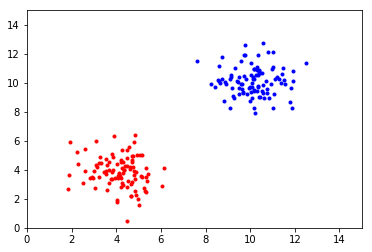

In [8]:
plot(DATA_Y[:,0])

## Training

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) 
for step in range(10000):
  sess.run([train_op_], {x_:DATA_X, y_:DATA_Y})
  if step % 100 == 0:
    prob, loss,w,b  = sess.run(
                        [yhat_, loss_,Theta['w'],Theta['b']],
                        feed_dict = {
                          x_:DATA_X,
                          y_:DATA_Y
                        }
                      )
    plot(prob[:,0])
    print "Step {:6d} cross_entropy loss : {}".format(step,loss)

KeyboardInterrupt: 